In [55]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [56]:
df = pd.read_csv('dataset_halfSecondWindow.csv')
data = df.copy()
oe = OrdinalEncoder()
ct = np.asarray(data['user'])
data['user'] = oe.fit_transform(ct.reshape(-1,1))
data = data.sort_values(by='user')
data



,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
62584,62584,84508,630.0,NaN,100.0,15.892297,15.892297,15.892297,3.606631,0.838142,...,89.730876,89.730876,89.730876,NaN,0.75,0.75,0.75,NaN,Walking,0.0
21106,21106,8609,234.0,NaN,100.0,10.142241,10.142241,10.142241,0.007413,0.840593,...,89.770732,89.770732,89.770732,NaN,13.50,13.50,13.50,NaN,Car,0.0
21105,21105,22422,1727.0,NaN,8.0,10.033811,9.701954,10.334343,0.317356,0.890862,...,89.794108,89.794108,89.794108,NaN,20.50,20.50,20.50,NaN,Car,0.0
21104,21104,11240,1151.0,NaN,100.0,10.044192,9.843447,10.144604,0.173851,0.772161,...,NaN,NaN,NaN,NaN,32.50,32.50,32.50,NaN,Car,0.0
21103,21103,7828,289.0,NaN,85.0,8.514446,8.514446,8.514446,0.062750,0.734319,...,89.738523,89.738523,89.738523,NaN,12.25,12.25,12.25,NaN,Car,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37690,37690,129745,309.0,NaN,8.0,10.805771,10.805771,10.805771,0.102640,NaN,...,71.595672,71.595672,71.595672,NaN,NaN,NaN,NaN,NaN,Train,12.0
37689,37689,129760,324.0,NaN,8.0,10.389200,10.389200,10.389200,0.019366,NaN,...,68.089832,68.089832,68.089832,NaN,NaN,NaN,NaN,NaN,Train,12.0
37688,37688,131014,1578.0,NaN,8.0,10.718977,10.704910,10.733045,0.019895,NaN,...,70.312179,70.312179,70.312179,NaN,NaN,NaN,NaN,NaN,Train,12.0
37699,37699,130782,1346.0,NaN,8.0,10.551876,10.463580,10.686567,0.118512,NaN,...,68.048667,68.048667,68.048667,NaN,NaN,NaN,NaN,NaN,Train,12.0


In [57]:


def col_names_change(data):
    data.drop(['Unnamed: 0','id', 'activityrecognition#0'],axis=1, inplace=True)
    data_col = ['time','activityrecognition_1']
    for i in data.columns[2:58]:
        b = i.split('.')[2].split('#')
        data_col.append(f'{b[0]}_{b[1]}')

    for i in data.columns[58:66]:
        b = i.split('#')
        data_col.append(f'{b[0]}_{b[1]}')

    data_col.append('target')
    data_col.append('user')
    data = pd.DataFrame.from_records(data.values)
    data.columns = data_col

    return data


data = col_names_change(data)
data



,time,activityrecognition_1,accelerometer_mean,accelerometer_min,accelerometer_max,accelerometer_std,game_rotation_vector_mean,game_rotation_vector_min,game_rotation_vector_max,game_rotation_vector_std,...,sound_mean,sound_min,sound_max,sound_std,speed_mean,speed_min,speed_max,speed_std,target,user
0,630.0,100.0,15.892297,15.892297,15.892297,3.606631,0.838142,0.838142,0.838142,0.006532,...,89.730876,89.730876,89.730876,NaN,0.75,0.75,0.75,NaN,Walking,0.0
1,234.0,100.0,10.142241,10.142241,10.142241,0.007413,0.840593,0.840593,0.840593,0.000640,...,89.770732,89.770732,89.770732,NaN,13.50,13.50,13.50,NaN,Car,0.0
2,1727.0,8.0,10.033811,9.701954,10.334343,0.317356,0.890862,0.890693,0.891030,0.000238,...,89.794108,89.794108,89.794108,NaN,20.50,20.50,20.50,NaN,Car,0.0
3,1151.0,100.0,10.044192,9.843447,10.144604,0.173851,0.772161,0.772161,0.772161,0.000368,...,NaN,NaN,NaN,NaN,32.50,32.50,32.50,NaN,Car,0.0
4,289.0,85.0,8.514446,8.514446,8.514446,0.062750,0.734319,0.734319,0.734319,0.002764,...,89.738523,89.738523,89.738523,NaN,12.25,12.25,12.25,NaN,Car,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,309.0,8.0,10.805771,10.805771,10.805771,0.102640,NaN,NaN,NaN,NaN,...,71.595672,71.595672,71.595672,NaN,NaN,NaN,NaN,NaN,Train,12.0
62581,324.0,8.0,10.389200,10.389200,10.389200,0.019366,NaN,NaN,NaN,NaN,...,68.089832,68.089832,68.089832,NaN,NaN,NaN,NaN,NaN,Train,12.0
62582,1578.0,8.0,10.718977,10.704910,10.733045,0.019895,NaN,NaN,NaN,NaN,...,70.312179,70.312179,70.312179,NaN,NaN,NaN,NaN,NaN,Train,12.0
62583,1346.0,8.0,10.551876,10.463580,10.686567,0.118512,NaN,NaN,NaN,NaN,...,68.048667,68.048667,68.048667,NaN,NaN,NaN,NaN,NaN,Train,12.0


<AxesSubplot:>

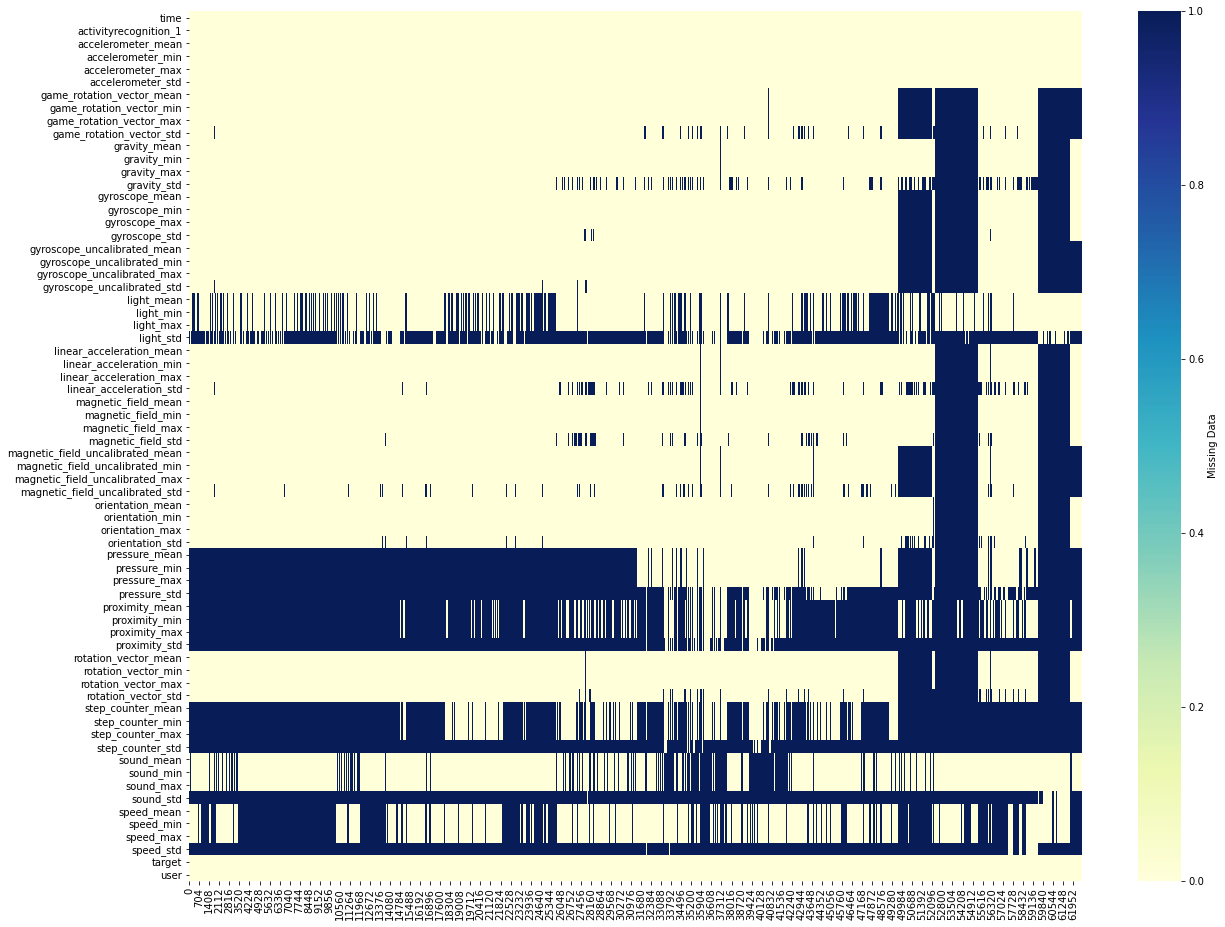

In [58]:
# check the missing data with seaborn

plt.figure(figsize=(20,16))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

<AxesSubplot:>

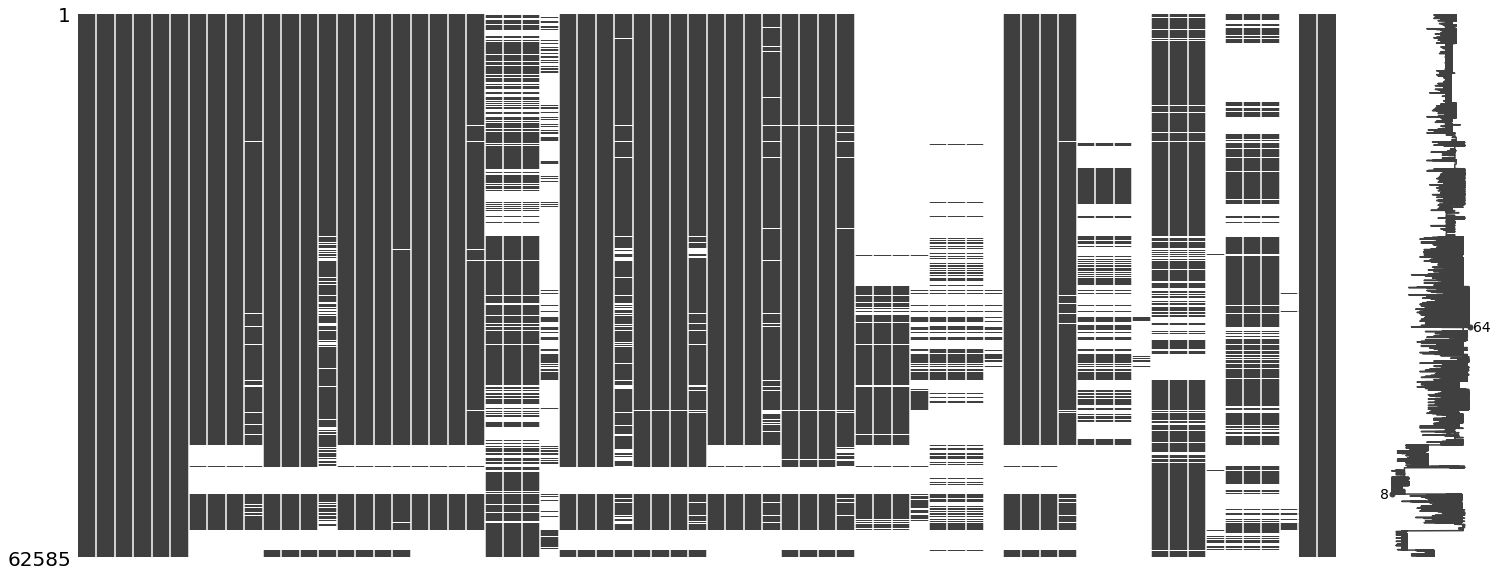

In [59]:
# check the missing value
msno.matrix(data)

In [60]:
missing_data = data.isnull().sum()
missing_data

time                         0
activityrecognition_1        0
accelerometer_mean           0
accelerometer_min            0
accelerometer_max            0
                         ...  
speed_min                25920
speed_max                25920
speed_std                60894
target                       0
user                         0
Length: 68, dtype: int64

In [61]:
data.drop(['pressure_mean', 'pressure_max', 'pressure_min', 'pressure_std', 'sound_std', 'speed_std','step_counter_mean','step_counter_std','light_std',
            'proximity_mean','proximity_min','proximity_max','proximity_std', 'step_counter_min', 'step_counter_max' ], axis=1, inplace=True)

data



,time,activityrecognition_1,accelerometer_mean,accelerometer_min,accelerometer_max,accelerometer_std,game_rotation_vector_mean,game_rotation_vector_min,game_rotation_vector_max,game_rotation_vector_std,...,rotation_vector_max,rotation_vector_std,sound_mean,sound_min,sound_max,speed_mean,speed_min,speed_max,target,user
0,630.0,100.0,15.892297,15.892297,15.892297,3.606631,0.838142,0.838142,0.838142,0.006532,...,0.994523,0.000100,89.730876,89.730876,89.730876,0.75,0.75,0.75,Walking,0.0
1,234.0,100.0,10.142241,10.142241,10.142241,0.007413,0.840593,0.840593,0.840593,0.000640,...,0.341133,0.000899,89.770732,89.770732,89.770732,13.50,13.50,13.50,Car,0.0
2,1727.0,8.0,10.033811,9.701954,10.334343,0.317356,0.890862,0.890693,0.891030,0.000238,...,0.884785,0.001769,89.794108,89.794108,89.794108,20.50,20.50,20.50,Car,0.0
3,1151.0,100.0,10.044192,9.843447,10.144604,0.173851,0.772161,0.772161,0.772161,0.000368,...,0.351964,0.000593,NaN,NaN,NaN,32.50,32.50,32.50,Car,0.0
4,289.0,85.0,8.514446,8.514446,8.514446,0.062750,0.734319,0.734319,0.734319,0.002764,...,0.551086,0.004103,89.738523,89.738523,89.738523,12.25,12.25,12.25,Car,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,309.0,8.0,10.805771,10.805771,10.805771,0.102640,NaN,NaN,NaN,NaN,...,0.459142,0.001581,71.595672,71.595672,71.595672,NaN,NaN,NaN,Train,12.0
62581,324.0,8.0,10.389200,10.389200,10.389200,0.019366,NaN,NaN,NaN,NaN,...,0.447098,0.001581,68.089832,68.089832,68.089832,NaN,NaN,NaN,Train,12.0
62582,1578.0,8.0,10.718977,10.704910,10.733045,0.019895,NaN,NaN,NaN,NaN,...,0.861405,0.000711,70.312179,70.312179,70.312179,NaN,NaN,NaN,Train,12.0
62583,1346.0,8.0,10.551876,10.463580,10.686567,0.118512,NaN,NaN,NaN,NaN,...,0.725028,0.000446,68.048667,68.048667,68.048667,NaN,NaN,NaN,Train,12.0


<AxesSubplot:>

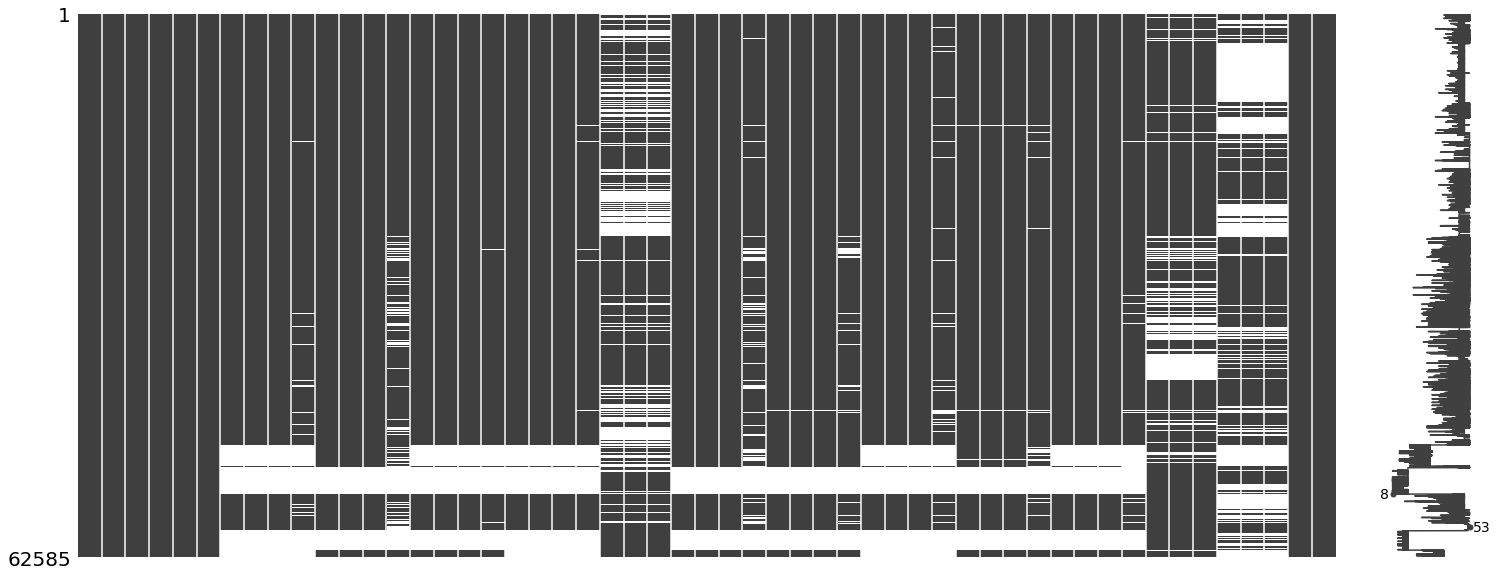

In [62]:
# check the missing data with missgno after the column drop

msno.matrix(data)

<Figure size 7200x4320 with 0 Axes>

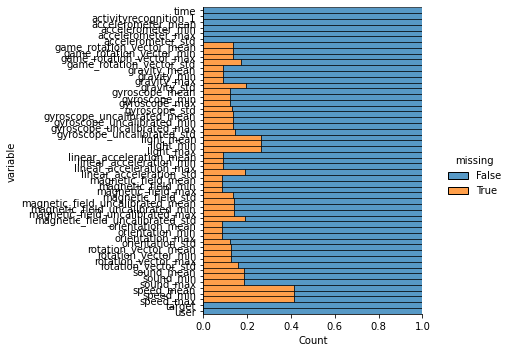

In [63]:
plt.figure(figsize=(100,60))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
    )

In [64]:
X ,y= data.drop(['target'],axis=1), data['target']

In [65]:
# Filled the nan data with zero

# data = data.fillna(0)
# data

imp_mode = SimpleImputer(missing_values=np.nan, strategy='mean')
new_data = imp_mode.fit_transform(X)

In [66]:
new_data

array([[6.30000000e+02, 1.00000000e+02, 1.58922971e+01, ...,
        7.50000000e-01, 7.50000000e-01, 0.00000000e+00],
       [2.34000000e+02, 1.00000000e+02, 1.01422411e+01, ...,
        1.35000000e+01, 1.35000000e+01, 0.00000000e+00],
       [1.72700000e+03, 8.00000000e+00, 1.00338114e+01, ...,
        2.05000000e+01, 2.05000000e+01, 0.00000000e+00],
       ...,
       [1.57800000e+03, 8.00000000e+00, 1.07189774e+01, ...,
        8.17425321e+00, 8.17425321e+00, 1.20000000e+01],
       [1.34600000e+03, 8.00000000e+00, 1.05518760e+01, ...,
        8.17425321e+00, 8.17425321e+00, 1.20000000e+01],
       [7.40000000e+01, 1.00000000e+02, 7.83106966e+00, ...,
        8.17425321e+00, 8.17425321e+00, 1.20000000e+01]])

In [67]:
new_data = pd.DataFrame(data=new_data)
new_data

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,630.0,100.0,15.892297,15.892297,15.892297,3.606631,0.838142,0.838142,0.838142,0.006532,...,0.994523,0.994523,0.000100,89.730876,89.730876,89.730876,0.750000,0.750000,0.750000,0.0
1,234.0,100.0,10.142241,10.142241,10.142241,0.007413,0.840593,0.840593,0.840593,0.000640,...,0.339861,0.341133,0.000899,89.770732,89.770732,89.770732,13.500000,13.500000,13.500000,0.0
2,1727.0,8.0,10.033811,9.701954,10.334343,0.317356,0.890862,0.890693,0.891030,0.000238,...,0.884785,0.884785,0.001769,89.794108,89.794108,89.794108,20.500000,20.500000,20.500000,0.0
3,1151.0,100.0,10.044192,9.843447,10.144604,0.173851,0.772161,0.772161,0.772161,0.000368,...,0.351126,0.351964,0.000593,78.575667,78.575427,78.575917,32.500000,32.500000,32.500000,0.0
4,289.0,85.0,8.514446,8.514446,8.514446,0.062750,0.734319,0.734319,0.734319,0.002764,...,0.543665,0.551086,0.004103,89.738523,89.738523,89.738523,12.250000,12.250000,12.250000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,309.0,8.0,10.805771,10.805771,10.805771,0.102640,0.753394,0.751321,0.755145,0.004322,...,0.459142,0.459142,0.001581,71.595672,71.595672,71.595672,8.174253,8.174253,8.174253,12.0
62581,324.0,8.0,10.389200,10.389200,10.389200,0.019366,0.753394,0.751321,0.755145,0.004322,...,0.447098,0.447098,0.001581,68.089832,68.089832,68.089832,8.174253,8.174253,8.174253,12.0
62582,1578.0,8.0,10.718977,10.704910,10.733045,0.019895,0.753394,0.751321,0.755145,0.004322,...,0.861405,0.861405,0.000711,70.312179,70.312179,70.312179,8.174253,8.174253,8.174253,12.0
62583,1346.0,8.0,10.551876,10.463580,10.686567,0.118512,0.753394,0.751321,0.755145,0.004322,...,0.725028,0.725028,0.000446,68.048667,68.048667,68.048667,8.174253,8.174253,8.174253,12.0


In [68]:
new_data.to_csv('clean_data.csv', columns= X.columns)

KeyError: "None of [Index(['time', 'activityrecognition_1', 'accelerometer_mean',\n       'accelerometer_min', 'accelerometer_max', 'accelerometer_std',\n       'game_rotation_vector_mean', 'game_rotation_vector_min',\n       'game_rotation_vector_max', 'game_rotation_vector_std', 'gravity_mean',\n       'gravity_min', 'gravity_max', 'gravity_std', 'gyroscope_mean',\n       'gyroscope_min', 'gyroscope_max', 'gyroscope_std',\n       'gyroscope_uncalibrated_mean', 'gyroscope_uncalibrated_min',\n       'gyroscope_uncalibrated_max', 'gyroscope_uncalibrated_std',\n       'light_mean', 'light_min', 'light_max', 'linear_acceleration_mean',\n       'linear_acceleration_min', 'linear_acceleration_max',\n       'linear_acceleration_std', 'magnetic_field_mean', 'magnetic_field_min',\n       'magnetic_field_max', 'magnetic_field_std',\n       'magnetic_field_uncalibrated_mean', 'magnetic_field_uncalibrated_min',\n       'magnetic_field_uncalibrated_max', 'magnetic_field_uncalibrated_std',\n       'orientation_mean', 'orientation_min', 'orientation_max',\n       'orientation_std', 'rotation_vector_mean', 'rotation_vector_min',\n       'rotation_vector_max', 'rotation_vector_std', 'sound_mean', 'sound_min',\n       'sound_max', 'speed_mean', 'speed_min', 'speed_max', 'user'],\n      dtype='object')] are in the [columns]"

In [ ]:
# data.to_csv('clean_data.csv')

In [ ]:
data['target']

0        Walking
1            Car
2            Car
3            Car
4            Car
          ...   
62580      Train
62581      Train
62582      Train
62583      Train
62584    Walking
Name: target, Length: 62585, dtype: object